<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/pandas_course/12_pivot_tables/02_metro_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
sns.set()


url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/00492/'
       'Metro_Interstate_Traffic_Volume.csv.gz')

In [8]:
# sam zamieniam datę z object na datetime64[ns]
metro = pd.read_csv(url, compression='gzip', parse_dates=['date_time'])
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [12]:
# znowu pobiera
# ustawia index na kolumnę date_time, bo wcześniej był 0,1,2,...
metro = pd.read_csv(url, compression='gzip', parse_dates=True,
                    index_col='date_time')
metro

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


In [13]:
metro = metro.loc['2016-01-01':]
metro

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2016-01-01 00:00:00,New Years Day,265.94,0.0,0.0,90,Haze,haze,1513
2016-01-01 00:00:00,New Years Day,265.94,0.0,0.0,90,Snow,light snow,1513
2016-01-01 01:00:00,None,266.00,0.0,0.0,90,Snow,light snow,1550
2016-01-01 03:00:00,None,266.01,0.0,0.0,90,Snow,light snow,719
2016-01-01 04:00:00,None,264.80,0.0,0.0,90,Clouds,overcast clouds,533
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


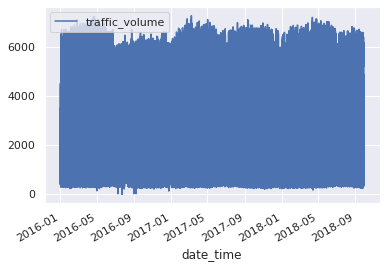

In [14]:
# %%
traffic = metro.iloc[:, -1:]
traffic.plot()

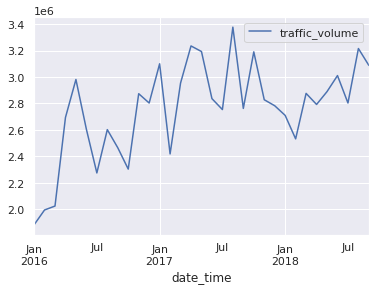

In [15]:
tr = traffic.resample('M').sum()
tr.plot()

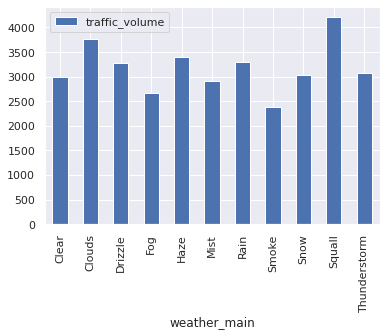

In [18]:
# %%
metro.pivot_table(values='traffic_volume', index='weather_main').plot(kind='bar')

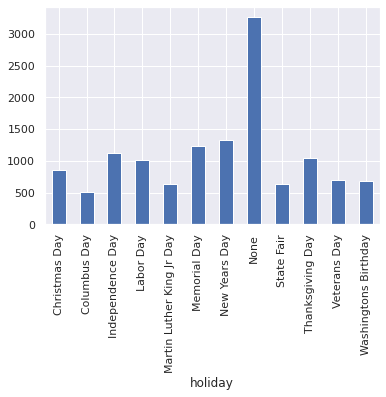

In [19]:
metro.groupby('holiday').mean()['traffic_volume'].plot(kind='bar')